In [1]:
import cv2
import numpy as np

In [20]:
######### 角点 ###########
img = cv2.imread('./lenna.jpg')
img = cv2.resize(img, (640, 480))
img_gray = np.float32(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
print(img_gray)

img_harris = cv2.cornerHarris(img_gray, 2, 3, 0.05)    # 2： blockSize: window size; 3: Sobel kernel size
cv2.imshow('img_harris ', img_harris)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
# 没法看原因：1. float类型； 2. img_harris本质上是每个pixel对于Harris函数的响应值
# 没有看的价值
print(img_harris)



[[81. 80. 79. ... 49. 50. 50.]
 [80. 80. 78. ... 49. 50. 51.]
 [79. 78. 77. ... 48. 50. 50.]
 ...
 [64. 59. 47. ... 36. 36. 36.]
 [67. 60. 46. ... 38. 39. 39.]
 [70. 64. 49. ... 54. 56. 57.]]
[[ 2.2000000e+00  2.2000000e+00  2.1999998e+00 ... -7.2382820e-01
  -4.2382812e-01 -8.1494145e-02]
 [ 2.2000000e+00  2.2000000e+00  2.1999998e+00 ... -7.2382820e-01
  -4.2382812e-01 -8.1494145e-02]
 [ 1.8742187e+00  1.8742187e+00 -2.0061035e+00 ... -1.1640644e-01
   4.9921870e-01  2.2011719e+00]
 ...
 [-7.5146228e+02 -7.5146228e+02 -6.5117437e+03 ...  1.8750001e-02
  -3.0322269e-02 -2.6997072e-01]
 [-2.2231958e+02 -2.2231958e+02 -8.4529727e+03 ... -9.4890625e+02
  -1.5692260e+03 -2.0242864e+03]
 [-3.3550708e+02 -3.3550708e+02 -1.1151047e+04 ... -5.6296564e+02
  -1.1611458e+03 -1.8365444e+03]]


In [6]:
# 为了显示清楚
# img_harris = cv2.dilate(img_harris , None)

thres = 0.05 * np.max(img_harris)
img[img_harris > thres] = [0, 0, 255]
cv2.imshow('img_harris ', img)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [17]:
##Harris Corner detectionx

from scipy.ndimage import filters
from numpy import *
from pylab import *

class Harris:
    
    def __init__(self, img):
        self.img = img
        pass
    
    def compute_harris_response(im,sigma=3):
        imx=zeros(im.shape)#计算导数
        filters.gaussian_filter(im,(sigma,sigma),(0,1),imx)
        imy=zeros(im.shape)
        filters.gaussian_filter(im,(sigma,sigma),(1,0),imy)
        Wxx=filters.gaussian_filter(imx*imx,sigma)
    #计算harris矩阵分量   
        Wxy=filters.gaussian_filter(imx*imy,sigma)
        Wyy=filters.gaussian_filter(imy*imy,sigma)
        Wdet=Wxx*Wyy-Wxy**2    #计算矩阵的特征值和迹
        Wtr=Wxx+Wyy
        return  Wdet/Wtr
    def get_harris_points(harrisim,min_dist=10,threshold=0.1):
        conner_threshold=harrisim.max()*threshold
        harrisim_t=(harrisim>conner_threshold)*1
    
        coords=array(harrisim_t.nonzero()).T
        candidate_values=[harrisim[c[0],c[1]] for c in coords]
        index=argsort(candidate_values)
        allowed_locations=zeros(harrisim.shape)
        allowed_locations[min_dist:-min_dist,min_dist:-min_dist]=1
        filtered_coords=[]
        for i in index:
            if allowed_locations[coords[i,0],coords[i,1]]==1:
                filtered_coords.append(coords[i])
                allowed_locations[(coords[i,0]-min_dist):(coords[i,0]+min_dist),(coords[i,1]-min_dist):(coords[i,1]+min_dist)]=0#此处保证min_dist*min_dist只有一个harris特征点
        return filtered_coords
    def plot_harris_points(image,filtered_coords):
        figure()
        gray()
        imshow(image)
        plot([p[1] for p in filtered_coords],[p[0]for p in filtered_coords],'+')
        axis('off')
        show()
        


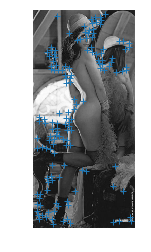

In [19]:
from PIL import Image
from numpy import *
from pylab import *


if __name__ == "__main__":
    

    from scipy.ndimage import filters
    im=array(Image.open('./lenna.jpg').convert('L'))
    harrisim=Harris.compute_harris_response(im)
    filtered_coords=Harris.get_harris_points(harrisim)
    Harris.plot_harris_points(im,filtered_coords)
